In [1]:
from sklearn.mixture import GMM
from sklearn import mixture
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.metrics import accuracy_score
import itertools
from scipy import linalg
%matplotlib inline

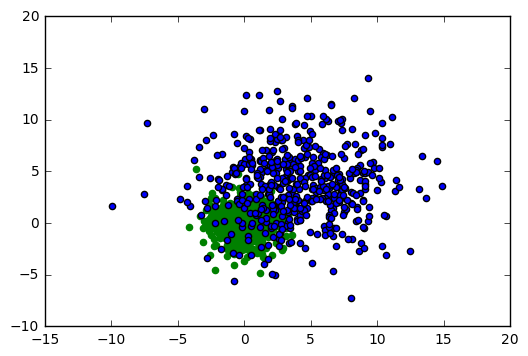

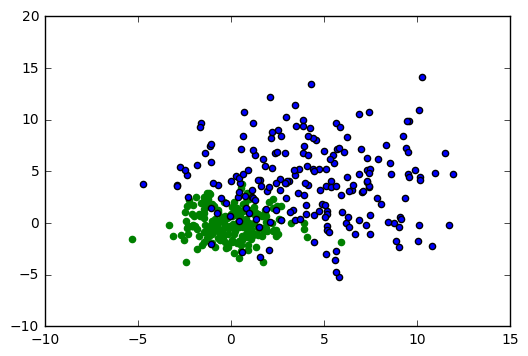

In [22]:
v = 4

middle_f = (0,0)
cov_matrix_f = np.array(([v / 2, 0 ], [0, v/2]))
firstSet =  np.random.multivariate_normal(middle_f, cov_matrix_f, 500)
firstSetTest =  np.random.multivariate_normal(middle_f, cov_matrix_f, 200)


middle_s = (v, v)
cov_matrix_s = np.array(([3*v, 0 ], [0, 3*v]))
secondSet = np.random.multivariate_normal(middle_s, cov_matrix_s, 500)
secondSetTest = np.random.multivariate_normal(middle_s, cov_matrix_s, 200)

plt.scatter(firstSet[:, 0],  firstSet[:, 1],color = 'green')
plt.scatter(secondSet[:, 0],  secondSet[:, 1])
plt.show()

x_train = np.concatenate((firstSet, secondSet))
y_train = np.concatenate([np.zeros((500)), np.ones((500))]).astype('int')

x_test = np.concatenate( [ firstSetTest, secondSetTest] )
y_test = np.concatenate([np.zeros((200)), np.ones((200))]).astype('int')

plt.scatter(firstSetTest[:, 0],  firstSetTest[:, 1],color = 'green')
plt.scatter(secondSetTest[:, 0],  secondSetTest[:, 1])
plt.show()

In [25]:
clf = mixture.GMM(n_components=2, covariance_type='diag')
clf.fit(x_train, y_train)
Y_ = clf.predict(x_test)
print y_test
print Y_
print accuracy_score(y_test, Y_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0

C:\Program Files\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in double_scalars


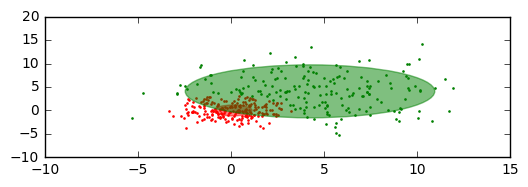

In [26]:
#plot

color_iter = itertools.cycle(['r', 'g', 'm', 'b', 'r'])
splot = plt.subplot(2, 1, 1)
for i, (mean, covar, color) in enumerate(zip(
        clf.means_, clf._get_covars(), color_iter)):
    
    v, w = linalg.eigh(covar)
    u = w[0] / linalg.norm(w[0])

    if not np.any(Y_ == i):
            continue
        
    plt.scatter(x_test[Y_ == i, 0], x_test[Y_ == i, 1], .8, color=color)

    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi 
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.show()

# UBM - model. Correct

In [41]:
accuracyVector = []
def computeMAP(x_train,y_train, x_test, y_test ):    
    nIter = 200
    ubm_model = mixture.GMM(n_components=2, covariance_type='diag', n_iter=100)
    ubm_model.fit(x_train, y_train)
    
    for i in range(1,nIter):
        
        adapted_gmm = mixture.GMM(n_components=2, covariance_type='diag', n_iter=1)
        adapted_gmm.means_ = ubm_model.means_
        adapted_gmm.covars_ = ubm_model.covars_
        adapted_gmm.weights_ = ubm_model.weights_
        adapted_gmm.fit(x_train,y_train)
        
        relevance_factor = 16
        
        n_i = adapted_gmm.weights_*relevance_factor
        alpha_i = n_i/(n_i+relevance_factor)
        adapted_gmm.means_[np.isnan(adapted_gmm.means_)] = 0.0
        return_means = (alpha_i*adapted_gmm.means_.T+(1-alpha_i)*(ubm_model.means_).T).T    
        ubm_model.means_ = return_means
        accuracy = accuracy_score(y_test, ubm_model.predict(x_test))
        #print ('%d iter:'% i), accuracy
        accuracyVector.append(accuracy)


In [42]:
computeMAP(x_train,y_train, x_test, y_test )

In [43]:
print np.max(accuracyVector)

0.915


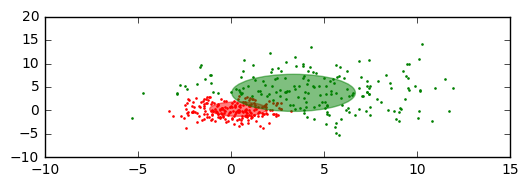

In [44]:
#plot

color_iter = itertools.cycle(['r', 'g', 'm', 'b', 'r'])
splot = plt.subplot(2, 1, 1)
for i, (mean, covar, color) in enumerate(zip(
        adapted_gmm.means_, adapted_gmm._get_covars(), color_iter)):
    
    v, w = linalg.eigh(covar)
    u = w[0] / linalg.norm(w[0])

    if not np.any(Y_ == i):
            continue
        
    plt.scatter(x_test[Y_ == i, 0], x_test[Y_ == i, 1], .8, color=color)

    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi 
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.show()